In [89]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

class Ray:
    def __init__(self, init_info, trajectory):
        self.a = init_info['a']
        self.init_theta = init_info['init_theta']
        self.init_vx = init_info['init_vx']
        self.init_vy = init_info['init_vy']

        self.r_trajectory = trajectory['r']
        self.theta_trajectory = trajectory['theta']
        self.phi_trajectory = trajectory['phi']
        return

rays = []
for fname in os.listdir('./../data/'):
    t = {}
    t['r'], t['theta'], t['phi'] = np.loadtxt(
        './../data/' + fname, 
        dtype='float', 
        delimiter=',', 
        unpack=True
    )
    l = re.match('.*_vx(.*)_vy(.*)_a(.*)_theta(.*)', fname)
    i = {}
    i['init_vx'], i['init_vy'], i['a'], i['init_theta'] = l.groups()
    rays.append(Ray(i, t))



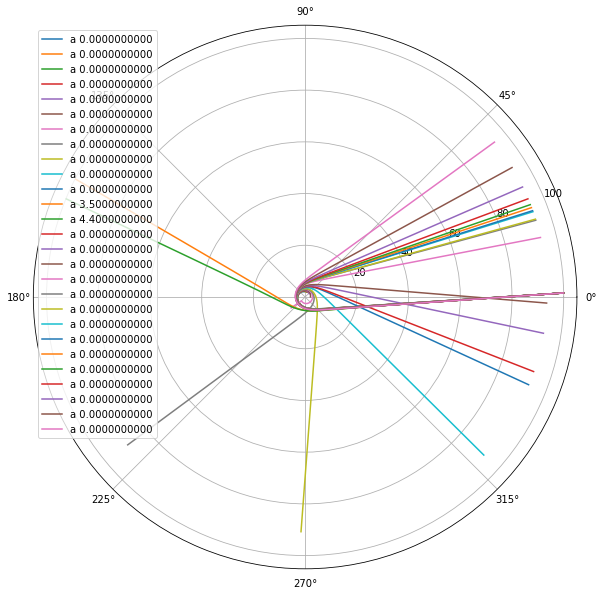

In [100]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'polar'})
fig.set_size_inches(10, 10)
for ray in rays:
    if abs(float(ray.init_vy) - 0) > 1e-5 or np.random.rand() < 0.95:
        continue
    ax.plot(ray.phi_trajectory, ray.r_trajectory, label=f'a {ray.a}')
ax.legend()

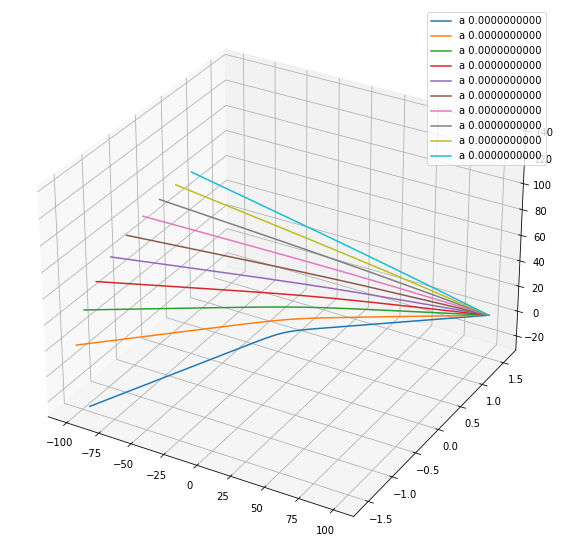

In [101]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
fig.set_size_inches(10, 10)
for ray in rays:
    if abs(float(ray.init_vy) - 0) < 1e-5 or np.random.rand() < 0.:
        continue
    r = ray.r_trajectory
    phi = ray.phi_trajectory
    theta = ray.theta_trajectory
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta) 
    ax.plot(x, y, z, label=f'a {ray.a}')
ax.legend()


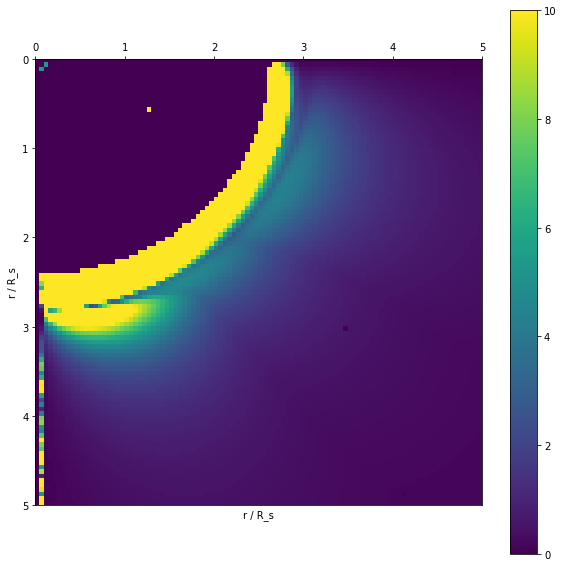

In [129]:

with open('./../data/image') as f:
    str = f.read().replace('\n', '')
ls = str.split(sep=',')
img = np.array([[float(ls[i + 100 * j]) for i in range(100)] for j in range(100)])

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
s = ax.imshow(
    img, 
    vmax=10, 
    extent=[0, 5, 5, 0]
)
ax.xaxis.set_ticks_position('top')
label ='r / R_s'
ax.set_xlabel(label)
ax.set_ylabel(label)
cbar = fig.colorbar(s)
